# Data Exploration

Foram utilizadas as seguintes bibliotecas para realizar a primeira parte do trabalho:

* Numpy
* Pandas
* Matplotlib

## Primeira parte

Foram carregados os arquivos `X.csv` e `Y.csv` e foram exibidos o inicio dos arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
import json

x_column_names = ['TimeStamp', 
                'all_..idle', 
                'X..memused',
                'proc.s',
                'cswch.s',
                'file.nr',
                'sum_intr.s',
                'ldavg.1',
                'tcpsck',
                'pgfree.s']
x_column_types = ['int64',
                  'float64',
                  'float64',
                  'float64',
                  'float64', 
                  'float64', 
                  'float64', 
                  'float64', 
                  'float64', 
                  'float64']
x_data = pd.read_csv('./data/X.csv')
x_data = x_data.astype(dict(zip(x_column_names, x_column_types)))
x_data.head()

,TimeStamp,all_..idle,X..memused,proc.s,cswch.s,file.nr,sum_intr.s,ldavg.1,tcpsck,pgfree.s
0,1409264779,0.0,73.03,47.0,62683.0,2496.0,15802.0,64.17,50.0,81151.0
1,1409264780,0.0,73.04,3.0,67595.0,2496.0,16139.0,64.17,50.0,78868.0
2,1409264781,0.0,73.05,0.0,69495.0,2496.0,15753.0,66.15,49.0,79990.0
3,1409264782,0.0,73.06,0.0,67977.0,2496.0,15849.0,66.15,48.0,78462.0
4,1409264783,0.0,73.06,0.0,69409.0,2496.0,15789.0,66.15,44.0,79337.0


In [11]:
y_column_names = ['TimeStamp', 'DispFrames']
y_column_types = ['int64', 'float64']

y_output = pd.read_csv('./data/Y.csv')
y_output = y_output.astype(dict(zip(y_column_names, y_column_types)))

y_output.head()

,TimeStamp,DispFrames
0,1409264779,17.269999
1,1409264780,22.440000
2,1409264781,24.000000
3,1409264782,20.950001
4,1409264783,15.340001


## Exercicios

Para as celulas seguintes serao realizadas as atividades propostas.

1. Compute the following statistics for each component of X and Y: mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.

In [15]:
x_metrics = dict()
y_metrics = dict()

def mean(data, column):
    return float(data[column].mean())

def maximum(data, column):
    return float(data[column].max())

def minimum(data, column):
    return float(data[column].max())

def percentile(data, column, percentile):
    return float(data[column].quantile(percentile))

def standard_deviation(data, column):
    return float(data[column].std())

for column in x_column_names:
    column_metrics = dict()
    
    column_metrics['mean'] = mean(x_data, column)
    column_metrics['maximum'] = maximum(x_data, column)
    column_metrics['minimum'] = minimum(x_data, column)
    column_metrics['25th_percentile'] = percentile(x_data, column, 0.25)
    column_metrics['90th_percentile'] = percentile(x_data, column, 0.9)
    column_metrics['standard_deviation'] = standard_deviation(x_data, column)
    
    x_metrics[column] = column_metrics
    
for column in y_column_names:
    column_metrics = dict()
    
    column_metrics['mean'] = mean(y_output, column)
    column_metrics['maximum'] = maximum(y_output, column)
    column_metrics['minimum'] = minimum(y_output, column)
    column_metrics['25th_percentile'] = percentile(y_output, column, 0.25)
    column_metrics['90th_percentile'] = percentile(y_output, column, 0.9)
    column_metrics['standard_deviation'] = standard_deviation(y_output, column)
    
    y_metrics[column] = column_metrics

print("X METRICS:")
print(json.dumps(x_metrics, indent = 4))

print("\nY METRICS:")
print(json.dumps(y_metrics, indent = 4))

X METRICS:
{
    "TimeStamp": {
        "mean": 1409266578.5,
        "maximum": 1409268378.0,
        "minimum": 1409268378.0,
        "25th_percentile": 1409265678.75,
        "90th_percentile": 1409268018.1,
        "standard_deviation": 1039.3748120865735
    },
    "all_..idle": {
        "mean": 9.064980555555556,
        "maximum": 69.54,
        "minimum": 69.54,
        "25th_percentile": 0.0,
        "90th_percentile": 38.621,
        "standard_deviation": 16.122822271521386
    },
    "X..memused": {
        "mean": 89.13751666666667,
        "maximum": 97.84,
        "minimum": 97.84,
        "25th_percentile": 82.965,
        "90th_percentile": 96.77,
        "standard_deviation": 8.183661998198009
    },
    "proc.s": {
        "mean": 7.683302777777778,
        "maximum": 48.0,
        "minimum": 48.0,
        "25th_percentile": 0.0,
        "90th_percentile": 20.0,
        "standard_deviation": 8.532605535161235
    },
    "cswch.s": {
        "mean": 54045.87402222222,

2. Compute the following quantities:
    a) the number of observations with memory usage larger than 80%;
    b) the average number of used TCP sockets for observations with more than 18000 interrupts/sec;
    c) the minimum memory utilization for observations with CPU idle time lower than 20%.

In [27]:
# The number of observations with memory usage larger than 80%;
# The column `all_..idle` holds information regarding idle CPU, so the 1 - x will be CPU usage metrics.

memory_usage_count = x_data[(100 - x_data['X..memused']) > 0.8]['X..memused'].count()

print('Memory usage above 80% count:', memory_usage_count)

Memory usage above 80% count: 0


In [25]:
# The average number of used TCP sockets for observations with more than 18000 interrupts/sec;
# First we filter the using the column `sum intr.s` and then do the average using the column `tcpsck`

avg_tcp = x_data[x_data['sum_intr.s'] > 18000]['tcpsck'].mean()
print('Average of TCP sockets:', avg_tcp)

Average of TCP sockets: 46.34730538922156


In [23]:
# The minimum memory utilization for observations with CPU idle time lower than 20%.
# First we filter with the column `all_..idle` and select the minimum from the column `X..memused`.

minimum_mem = x_data[x_data['all_..idle'] < 0.2]['X..memused'].min()
print('Minimum memory utilization:', minimum_mem)

Minimum memory utilization: 73.03


3. Produce the following plots:
    a) Time series of percentage of idle CPU and of used memory (both in a single plot);
    b) Density plots, histograms, and box plots of idle CPU and of used memory.

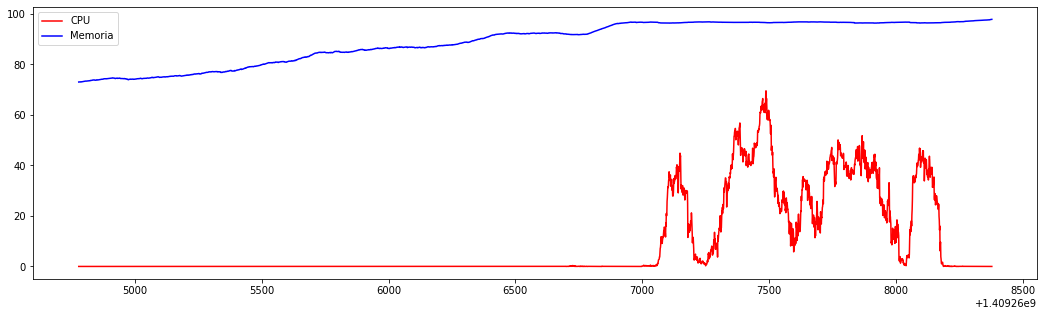

In [7]:
pp.figure(figsize = (18, 5))

timestamps = x_data['TimeStamp']

pp.plot(timestamps, x_data['all_..idle'], 'r')
pp.plot(timestamps, x_data['X..memused'], 'b')
pp.legend(['CPU', 'Memoria'])
pp.show()

<AxesSubplot:ylabel='Density'>

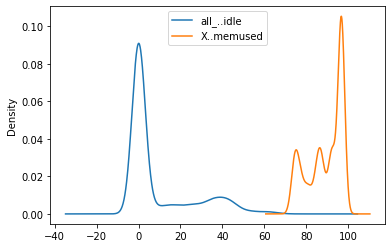

In [8]:
# Density plots CPU and memory.
x_data['all_..idle'].plot(kind='density', legend=True)
x_data['X..memused'].plot(kind='density', legend=True)

<AxesSubplot:ylabel='Frequency'>

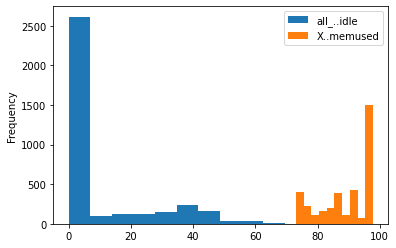

In [9]:
# Histogram for CPU and memory.
x_data['all_..idle'].plot(kind='hist', legend=True)
x_data['X..memused'].plot(kind='hist', legend=True)

<Figure size 1296x360 with 0 Axes>

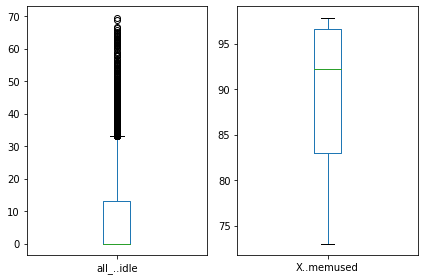

In [10]:
# Boxplot for CPU and memory.
pp.figure(figsize = (18, 5))
fig, axes = pp.subplots(1, 2)
x_data['all_..idle'].plot(kind='box', by='type', ax=axes.flatten()[0])
x_data['X..memused'].plot(kind='box', by='type', ax=axes.flatten()[1])
pp.tight_layout()
pp.show()

In [ ]:
ffffffffffffffffffffffffififififififififififififififififififififififixfixfixfixfixfixfixfixfixfixfixfixfixfixfixfixfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi-xfi